## Central Limit Theorem

### The Central Limit Theorem (CLT)

- Given a sufficiently large sample:
    - **The means of the samples in a set of samples (the sample means) will be approximately normally distributed,**
    - This normal distribution will have a mean close to the mean of the population, and
    - The variance of the sample means will be close to the variance of the population divided by the sample size.

In [2]:
from lecture8_segment1 import *

[0.2 0.2 0.2 0.2 0.2]


(array([0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

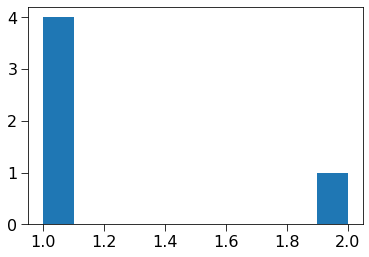

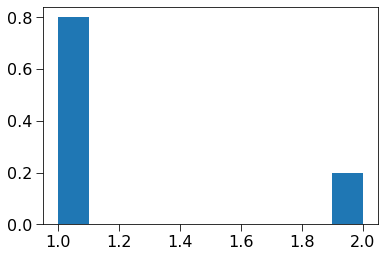

In [3]:
L = [1,1,1,1,2]
pylab.hist(L)
factor = pylab.array(len(L)*[1])/len(L)
print(factor)
pylab.figure()
pylab.hist(L, weights = factor)

### Checking CLT

Mean of rolling 1 die = 2.49969613880457, Std = 1.4431291844990664
Mean of rolling 50 dice = 2.498043114704141, Std = 0.2039489399412383


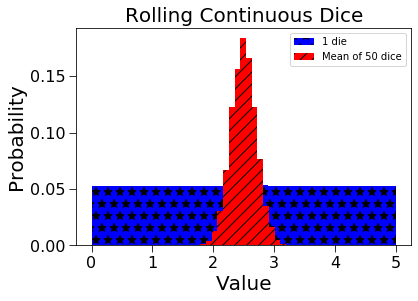

In [4]:
mean, std = plotMeans(1, 1000000, 19, '1 die', 'b', '*')
print('Mean of rolling 1 die =', str(mean) + ',', 'Std =', std)
mean, std = plotMeans(50, 1000000, 19, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend() 

Text(0.5, 1.0, 'Expected Return Betting a Pocket')

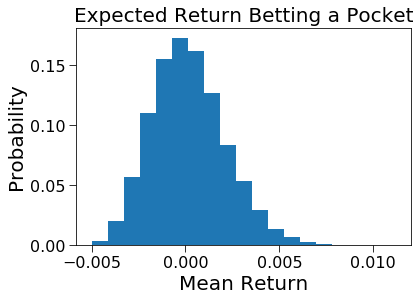

In [5]:
numTrials = 50000
numSpins = 200
game = FairRoulette()

means = []
for i in range(numTrials):
   means.append(findPocketReturn(game, 1, numSpins)[0]/numSpins)

pylab.hist(means, bins = 19,
          weights = pylab.array(len(means)*[1])/len(means))
pylab.xlabel('Mean Return')
pylab.ylabel('Probability')
pylab.title('Expected Return Betting a Pocket')

### Moral
- It doesn't matter what the shape of the distribution of values happens to be
- If we are trying to estimate the mean of a population using sufficiently large samples,
- The CLT allows us to use the empirical rule when computing confidence intervals

### Exercise 1-2
We are handed a biased coin and want to infer the probability that it lands on heads. Use the code provided for CLT, along with the provided helper function flipCoin, to generate confidence intervals for the probability of heads. You should only need to change a few lines of code.

```python
meanOfMeans, stdOfMeans = [], []
sampleSizes = range(10, 500, 50)

def clt():
    for sampleSize in sampleSizes:
        sampleMeans = []
        for t in range(20):
            sample = flipCoin(sampleSize)
            sampleMeans.append(getMeanAndStd(sample)[0])
        ## FILL IN TWO LINES
        ## WHAT TO DO WITH THE SAMPLE MEANS?
        meanOfMeans.append(getMeanAndStd(sampleMeans)[0])
        stdOfMeans.append(getMeanAndStd(sampleMeans)[1])
```

In [6]:
from flipcoin import *

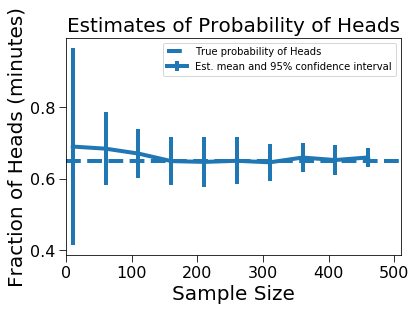

In [7]:
clt()
pylab.figure(1)
pylab.errorbar(sampleSizes, meanOfMeans,
               yerr = 1.96*pylab.array(stdOfMeans),
               label = 'Est. mean and 95% confidence interval')
pylab.xlim(0, max(sampleSizes) + 50)
pylab.axhline(0.65, linestyle = '--',
              label = 'True probability of Heads')
pylab.title('Estimates of Probability of Heads')
pylab.xlabel('Sample Size')
pylab.ylabel('Fraction of Heads (minutes)')
pylab.legend(loc = 'best')
pylab.show()